# DS5220 HW1

## KAVANA VENKATESH

---

## Solution 7

## Gradient Descent

### Import Libraries

In [1]:
#importing the necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cmath
#! pip install statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from pylab import meshgrid

---

### Plot the 3-D graph

<Figure size 432x288 with 0 Axes>

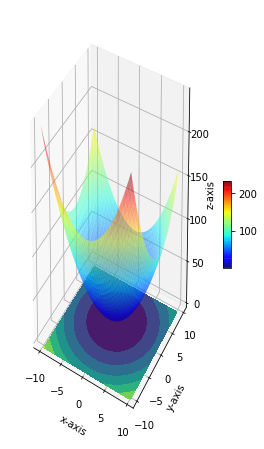

In [2]:
# function to be plotted 7.4
def z_func(x1,x2):
    return (x1**2 +(x2-2)**2)

x1 = np.arange(-10.0, 10, 0.1) # x1 >= 0 according to given conditions
x2 = np.arange(-10.0, 10, 0.1) # x2 <= 1 according to given conditions

X1,X2 = meshgrid(x1, x2)
Z = z_func(X1, X2)

fig = plt.figure()
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,vmin=0, vmax=np.nanmax(Z),linewidth=0, antialiased=False)
surf = ax.plot_surface(X1, X2, Z, rstride=5, cstride=5, cmap = 'jet', alpha = .5)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=25)
ax.contourf(X1, X2, Z, zdir='z', offset=-8)
fig.colorbar(surf, shrink=0.2, aspect=10) # legend
plt.show()

---

### Gradient Descent

In [3]:
# Answer 7.2
def grad_descent(cur_x1,cur_x2,rate,precision,max_iters):
     
    #cur_x1 = 1 # The algorithm starts at x1 = 1
    #cur_x2 = 1 # The algorithm starts at x2 = 1
    #rate = .01 # Learning rate
    #precision = 0.0001               # This tells us when to stop the algorithm

    #max_iters = 10000                # maximum number of iterations
    iters = 0                         #iteration counter
    df = lambda x1,x2: 2*x1 + 2*x2 -4 #Gradient of our function 
    df1 = lambda x1: 2*x1
    df2 = lambda x2: 2*x2 -4
    f = lambda x1,x2: x1**2 + (x2 -2)**2
    x1_trace = []
    x2_trace = []
    x1_trace.append(cur_x1)
    x2_trace.append(cur_x2)
    error = 1
    while error >= 0.0001 and iters < max_iters:
        prev_x1,prev_x2 = cur_x1,cur_x2 #Store current x value in prev_x
        f_prev = f(prev_x1,prev_x2)
        cur_x1 = cur_x1 - rate * df1(prev_x1) #Grad descent
        cur_x2 = cur_x2 - rate * df2(prev_x2) #Grad descent
        f_cur = f(cur_x1,cur_x2)
        #previous_step_size = (abs(cur_x1 - prev_x1)+abs(cur_x2 - prev_x2))
        error = abs(f_prev-f_cur)
        #precision = df(cur_x1,cur_x2)
        #precision = max(abs(cur_x1 - prev_x1),abs(cur_x2 - prev_x2))
        iters = iters + 1 #iteration count
        x1_trace.append(cur_x1)
        x2_trace.append(cur_x2)
        #print("value of function ",f(cur_x1,cur_x2))

        #print(" Step size is ",previous_step_size)
    if iters == max_iters:
        print("Maximum iterations reached!")
    else:
        print("Iteration",iters,"\nx1,x2 value is(",cur_x1,cur_x2,")") #Print iterations

        print("The global minimum occurs at", cur_x1,cur_x2)
    return x1_trace,x2_trace

---

### Part-i : Use the learning rate ρ = 0.01 and the initial point (x1, x2) = (1, 1). Plot the sequence of obtained points. After how many iterations does GD converge? 

In [4]:
# calling the above function for learning rate = 0.01, initial points (1,1)

x1_trace,x2_trace = grad_descent(1,1,0.01,0.0001,10000)
# printing the points at each iteration

for i in range(len(x1_trace)):
    print("(",x1_trace[i],",", x2_trace[i],")")
            

Iteration 167 
x1,x2 value is( 0.03425741908792875 1.9657425809120714 )
The global minimum occurs at 0.03425741908792875 1.9657425809120714
( 1 , 1 )
( 0.98 , 1.02 )
( 0.9604 , 1.0396 )
( 0.941192 , 1.058808 )
( 0.92236816 , 1.07763184 )
( 0.9039207968 , 1.0960792032 )
( 0.885842380864 , 1.1141576191359999 )
( 0.86812553324672 , 1.1318744667532799 )
( 0.8507630225817856 , 1.1492369774182143 )
( 0.8337477621301499 , 1.16625223786985 )
( 0.8170728068875469 , 1.1829271931124532 )
( 0.800731350749796 , 1.199268649250204 )
( 0.7847167237348001 , 1.2152832762652 )
( 0.769022389260104 , 1.230977610739896 )
( 0.7536419414749019 , 1.246358058525098 )
( 0.7385691026454039 , 1.261430897354596 )
( 0.7237977205924958 , 1.276202279407504 )
( 0.7093217661806459 , 1.290678233819354 )
( 0.6951353308570329 , 1.304864669142967 )
( 0.6812326242398923 , 1.3187673757601077 )
( 0.6676079717550945 , 1.3323920282449055 )
( 0.6542558123199925 , 1.3457441876800074 )
( 0.6411706960735927 , 1.3588293039264072 )
( 

---

### Plotting the trajectory of points

In [5]:
# Plotting the trajectory of points 
def plot_graph(x1_trace,x2_trace):
    def z_func(x1,x2):
        return (x1**2 +(x2-2)**2)

    x1 = np.arange(-2, 2, 0.05) # x1 >= 0 according to given conditions
    x2 = np.arange(-2, 2, 0.05) # x2 <= 1 according to given conditions

    X1,X2 = meshgrid(x1, x2)
    Z = z_func(X1, X2)

    # for gradient decent plotting
    x1_trace_n=np.array(x1_trace)
    x2_trace_n=np.array(x2_trace)
    #x1tr,x2tr = meshgrid(x1_trace,x2_trace)
    #Z1 = z_func(x1tr, x2tr)
    ztr = z_func(x1_trace_n, x2_trace_n)


    fig = plt.figure()
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax = fig.gca(projection='3d')

    # plotting the function
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha = .3, vmax=np.nanmax(Z),cmap = 'jet')

    # plotting the points in gradient descent
    ax.plot(x1_trace_n,x2_trace_n,ztr, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')
    #for i in range(len(x1_trace_n)):
       # if i%50 == 0:
            #ax.text(x1_trace_n[i],x2_trace_n[i], ztr[i], i)
    
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.view_init(elev=25)
    #ax.contourf(X1, X2, Z, zdir='z', offset=-8)
    #fig.colorbar(surf, shrink=0.2, aspect=10) # legend
    plt.show()

<Figure size 432x288 with 0 Axes>

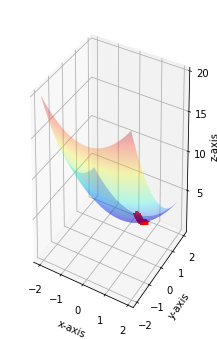

In [6]:
plot_graph(x1_trace,x2_trace)

---

### Plot to show the trajectory of convergence

<function matplotlib.pyplot.show(*args, **kw)>

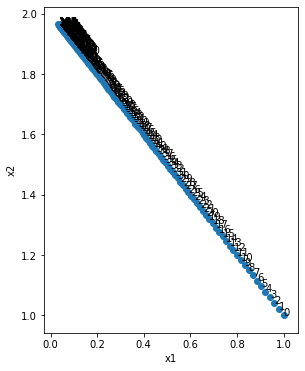

In [7]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1, 2, 1)


ax.scatter(x1_trace,x2_trace)
for i in range(len(x1_trace)):
    ax.text(x1_trace[i],x2_trace[i], i)
ax.set_xlabel('x1')
ax.set_ylabel('x2')


plt.show

### Part-i : Use the learning rate ρ = 0.1 and the initial point (x1, x2) = (1, 1). Plot the sequence of obtained points. After how many iterations does GD converge? 

In [8]:
# For learning rate = 0.1, initial points (1,1)
x1_trace,x2_trace = grad_descent(1,1,0.1,0.0001,10000)
# printing the points at each iteration

for i in range(len(x1_trace)):
    print("(",x1_trace[i],",", x2_trace[i],")")
            

Iteration 21 
x1,x2 value is( 0.009223372036854777 1.9907766279631454 )
The global minimum occurs at 0.009223372036854777 1.9907766279631454
( 1 , 1 )
( 0.8 , 1.2 )
( 0.64 , 1.3599999999999999 )
( 0.512 , 1.488 )
( 0.4096 , 1.5904 )
( 0.32768 , 1.67232 )
( 0.26214400000000004 , 1.737856 )
( 0.20971520000000005 , 1.7902848 )
( 0.16777216000000003 , 1.83222784 )
( 0.13421772800000004 , 1.8657822720000001 )
( 0.10737418240000003 , 1.8926258176000001 )
( 0.08589934592000002 , 1.91410065408 )
( 0.06871947673600001 , 1.931280523264 )
( 0.05497558138880001 , 1.9450244186112 )
( 0.04398046511104001 , 1.95601953488896 )
( 0.035184372088832 , 1.964815627911168 )
( 0.028147497671065603 , 1.9718525023289344 )
( 0.02251799813685248 , 1.9774820018631476 )
( 0.018014398509481985 , 1.9819856014905182 )
( 0.014411518807585589 , 1.9855884811924145 )
( 0.01152921504606847 , 1.9884707849539316 )
( 0.009223372036854777 , 1.9907766279631454 )


<Figure size 432x288 with 0 Axes>

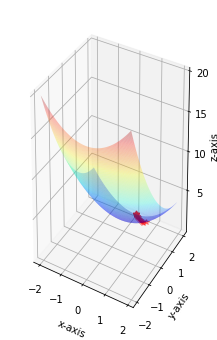

In [9]:
plot_graph(x1_trace,x2_trace)

---

### Plot to show the convergence of points

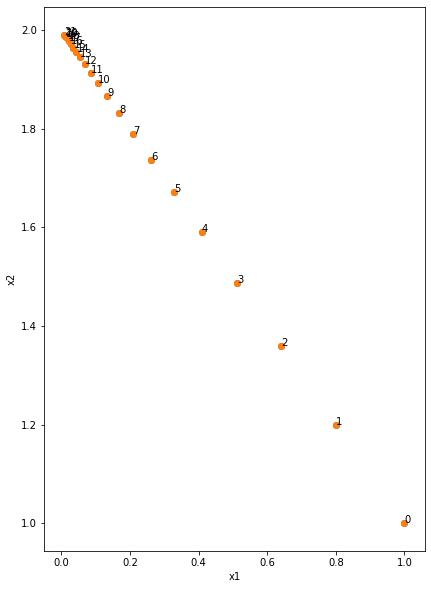

In [10]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1, 2, 1)


ax.scatter(x1_trace,x2_trace)
#for i in range(7):
    #ax.text(x1_trace_n[i],x2_trace_n[i], i)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.scatter(x1_trace,x2_trace)
for i in range(len(x1_trace)):
    ax.text(x1_trace[i],x2_trace[i], i)
plt.show()

### Part-iii:. Use the learning rate ρ = 5 and the initial point (x1, x2) = (1, 1). Plot the sequence of obtained points. After how many iterations does GD converge?

In [11]:
# For learning rate = 5, initial points (1,1)

x1_trace,x2_trace = grad_descent(1,1,5,0.0001, 150)
# printing the points at each iteration

for i in range(len(x1_trace)):
    print("(",x1_trace[i],",", x2_trace[i],")")

Maximum iterations reached!
( 1 , 1 )
( -9 , 11 )
( 81 , -79 )
( -729 , 731 )
( 6561 , -6559 )
( -59049 , 59051 )
( 531441 , -531439 )
( -4782969 , 4782971 )
( 43046721 , -43046719 )
( -387420489 , 387420491 )
( 3486784401 , -3486784399 )
( -31381059609 , 31381059611 )
( 282429536481 , -282429536479 )
( -2541865828329 , 2541865828331 )
( 22876792454961 , -22876792454959 )
( -205891132094649 , 205891132094651 )
( 1853020188851841 , -1853020188851839 )
( -16677181699666569 , 16677181699666571 )
( 150094635296999121 , -150094635296999119 )
( -1350851717672992089 , 1350851717672992091 )
( 12157665459056928801 , -12157665459056928799 )
( -109418989131512359209 , 109418989131512359211 )
( 984770902183611232881 , -984770902183611232879 )
( -8862938119652501095929 , 8862938119652501095931 )
( 79766443076872509863361 , -79766443076872509863359 )
( -717897987691852588770249 , 717897987691852588770251 )
( 6461081889226673298932241 , -6461081889226673298932239 )
( -58149737003040059690390169 , 581

##### We see that maximum iterations have reached and the value of x1 and x2 are infinitely large. This means that instead to reachig the global minima the points have overshooted in the opposite directon of global minima for a learning rate of 5.

We try to oberve the first few values of the trajectory followed by the points x1 and x2

In [12]:
for i in range(15):
    print("(",x1_trace[i],",", x2_trace[i],")")

( 1 , 1 )
( -9 , 11 )
( 81 , -79 )
( -729 , 731 )
( 6561 , -6559 )
( -59049 , 59051 )
( 531441 , -531439 )
( -4782969 , 4782971 )
( 43046721 , -43046719 )
( -387420489 , 387420491 )
( 3486784401 , -3486784399 )
( -31381059609 , 31381059611 )
( 282429536481 , -282429536479 )
( -2541865828329 , 2541865828331 )
( 22876792454961 , -22876792454959 )


We can see the values are growing , so we will be plotting only a part of it as it goes to infinite as it has overshooted instead of reaching the minimum value

### Plot to show the trajectory of convegence


Since the points are too large to plot, we have taken only 19 points to plot and observe the trajectory of convergence and the points are too close so that the numbering is overlapped.

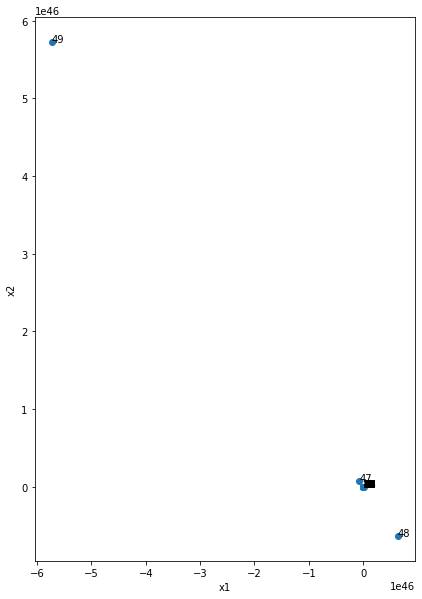

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1, 2, 1)

x1_trace_n=np.array(x1_trace[0:50])
x2_trace_n=np.array(x2_trace[0:50])
ax.scatter(x1_trace_n,x2_trace_n)

for i in range(len(x1_trace_n)):
    ax.text(x1_trace_n[i],x2_trace_n[i], i)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

### Convergence is not happening for  a learning rate of 5 
As we see that the points follow a zig zag pattern while moving away from the global minumum value.

### Inference : 

We can see from the different scatter plots that if learning rate is less ( here 0.01) , convergence takes more iteration,while for a greater learning rate (here 0.1) the covergence takes lesser iteration. But for very high learning rate( here 5), the convergence never happens, rather the points are moving far away from the minimum value. Therefore choosing a correct learning rate is very important for convergence.

---

## Solution 8

## Linear Regression

### Import the Libraries

In [14]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

In [15]:
# Creating the input vectors
data = [(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(-0.20, 0.17),(-0.5, 0.42),(1.50, 2.62)]
x=[]
y=[]
for d in data:
    x.append(d[0])
    y.append(d[1])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)


In [16]:
# Add one for calculating theta_0
x_ = np.array([[0.1,1.],
       [ 0.5,1.],
       [0.9,1.],
       [ -0.2,1.],
       [ -0.5,1.],
       [ 1.5,1.]])

In [17]:
# calculate coefficients using closed-form solution
def get_optimal(x_,y):
    return inv(x_.transpose().dot(x_)).dot(x_.transpose()).dot(y)

theta_1 = get_optimal(x_,y)[0]
theta_0 = get_optimal(x_,y)[1]

print("The value of theta_1 is {} and theta_0 is {}"
      .format(get_optimal(x_,y)[0],
        get_optimal(x_,y)[1]))

The value of theta_1 is [0.90305437] and theta_0 is [0.37216249]


In [18]:
# Function to determine the predicted values
def predict(data,theta_1,theta_0):    
    predicted_vals = []
    for i in range(len(data)):
        print('For x= ',data[i])
        Y = theta_1 * data[i] + theta_0
        predicted_vals.append(Y)
        print(Y)
    return predicted_vals

In [19]:
# Reshaping X to predict now
x = x.reshape(1,-1).tolist()[0]
print(x)

[0.1, 0.5, 0.9, -0.2, -0.5, 1.5]


In [20]:
# Predict the new values
Y = predict(x,theta_1,theta_0)

For x=  0.1
[0.46246793]
For x=  0.5
[0.82368968]
For x=  0.9
[1.18491142]
For x=  -0.2
[0.19155162]
For x=  -0.5
[-0.07936469]
For x=  1.5
[1.72674404]


### Plot the Predicted Linear Regression Line

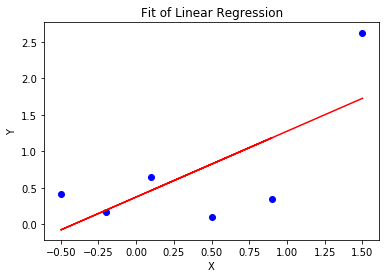

In [21]:
# Plotting the training data
plt.scatter(x,y,color='blue')
# Plotting the predictions
plt.plot(x,Y,color='red')
plt.title('Fit of Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Plot after removing the last data point

In [22]:
x = x[0:len(x)-1]
x

[0.1, 0.5, 0.9, -0.2, -0.5]

In [23]:
y = y.reshape(1,-1).tolist()[0]
y = y[0:len(y)-1]
y

[0.65, 0.1, 0.35, 0.17, 0.42]

In [24]:
# Get the values of theta for the updated data set
# Add 1 for theta_0
x_ = np.array([[0.1,1.],
       [ 0.5,1.],
       [0.9,1.],
       [ -0.2,1.],
       [ -0.5,1.]])
theta_1 = get_optimal(x_,y)[0]
theta_0 = get_optimal(x_,y)[1]

print("The value of theta_1 is {} and theta_0 is {}"
      .format(get_optimal(x_,y)[0],
              get_optimal(x_,y)[1]))

The value of theta_1 is -0.06850649350649352 and theta_0 is 0.348961038961039


---

Let us plot the line again for the updated data points. 

In [25]:
print("x:" , x)
print('\n')

Y = predict(x,theta_1,theta_0)
print('\n')
print("Y:", Y)

x: [0.1, 0.5, 0.9, -0.2, -0.5]


For x=  0.1
0.3421103896103897
For x=  0.5
0.31470779220779227
For x=  0.9
0.28730519480519484
For x=  -0.2
0.36266233766233774
For x=  -0.5
0.3832142857142858


Y: [0.3421103896103897, 0.31470779220779227, 0.28730519480519484, 0.36266233766233774, 0.3832142857142858]


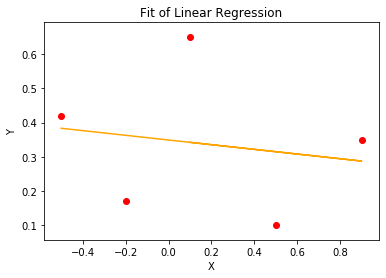

In [27]:
# Plotting the training data
plt.scatter(x,y,color='red')
# Plotting the predictions
plt.plot(x,Y,color='orange')
plt.title('Fit of Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We can observe from the two plots that the new line(orange in colour) has shifted down compared to the the old line (red in colour) and is not close to the old line. 

This is because the point (1.50,2.62) is an outlier as we can see from the above graph, and when this point was included to find the values of theta, the line tried to reduce the RMSE by including the outlier point. 
Removing the point from the data led to a different data pattern, which was captured by the second line. This in fact shows us how the outliers affect our prediction in the closed form of  linear regression. 